In [41]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Synthetic
rng = np.random.default_rng(42)
n = 1000
dates = pd.date_range(end=pd.Timestamp.today(), periods=n, freq='D')
df = pd.DataFrame({
    'date': dates,     
    'feature_a': np.abs(rng.normal(50, 20, n)),
    'feature_b': rng.normal(0, 1, n),
    'feature_c': rng.exponential(30, n),
    'category': rng.choice(['A', 'B', 'C'], size=n, p=[0.5, 0.3, 0.2]),
    'target': 10 + 0.5 * np.linspace(0, n-1, n) + rng.normal(0, 10, n)
    })

# Add missing values & outliers
df.loc[rng.choice(n, size=30, replace=False), 'feature_a'] = np.nan
outlier_idx = rng.choice(n, size=5, replace=False)
df.loc[outlier_idx, 'feature_c'] *= 10

print(df.head())

                        date  feature_a  feature_b  feature_c category  \
0 2022-11-28 23:05:36.836542  56.094342  -0.059283   0.931144        B   
1 2022-11-29 23:05:36.836542  29.200318  -0.729287   9.335183        A   
2 2022-11-30 23:05:36.836542  65.009024  -0.414473  17.165518        A   
3 2022-12-01 23:05:36.836542  68.811294   0.633910  13.312095        A   
4 2022-12-02 23:05:36.836542  10.979296   0.002993  15.860342        B   

      target  
0  12.834414  
1   0.158889  
2   7.950778  
3   4.596704  
4  18.018956  


In [42]:
# 2. Profiling: Info, Describe, Missing Counts
print("\n--- DATAFRAME INFO ---\n")
df.info()

print("\n--- DESCRIPTIVE STATISTICS ---\n")
display(df.describe(include='all').T)

print("\n--- MISSING COUNTS ---\n")
missing = df.isna().sum().sort_values(ascending=False)
display(missing[missing > 0])

# Identify numeric & categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)


--- DATAFRAME INFO ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1000 non-null   datetime64[ns]
 1   feature_a  970 non-null    float64       
 2   feature_b  1000 non-null   float64       
 3   feature_c  1000 non-null   float64       
 4   category   1000 non-null   object        
 5   target     1000 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 47.0+ KB

--- DESCRIPTIVE STATISTICS ---



,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date,1000,NaN,NaN,NaN,2024-04-11 11:05:36.836542208,2022-11-28 23:05:36.836542,2023-08-05 17:05:36.836541952,2024-04-11 11:05:36.836541952,2024-12-17 05:05:36.836541952,2025-08-23 23:05:36.836542,NaN
feature_a,970.0,NaN,NaN,NaN,49.515994,0.033997,35.867666,50.177651,62.272659,113.577074,19.640637
feature_b,1000.0,NaN,NaN,NaN,-0.081378,-3.047633,-0.730254,-0.043785,0.602724,2.914245,1.014542
feature_c,1000.0,NaN,NaN,NaN,31.703896,0.005642,8.289031,21.566996,42.015955,1482.510205,55.20353
category,1000,3,A,513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target,1000.0,NaN,NaN,NaN,259.524494,0.158889,137.314046,258.406288,382.335724,525.505403,144.332983



--- MISSING COUNTS ---



feature_a    30
dtype: int64

Numeric columns: ['feature_a', 'feature_b', 'feature_c', 'target']
Categorical columns: ['category']


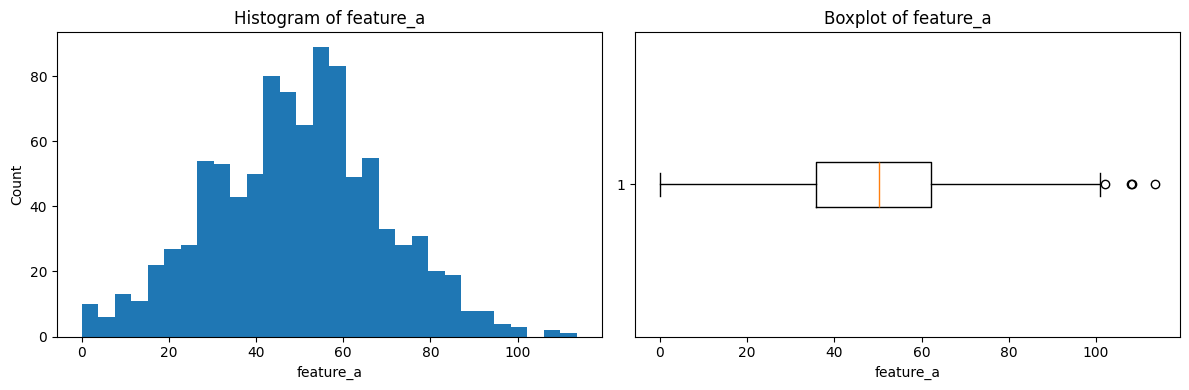

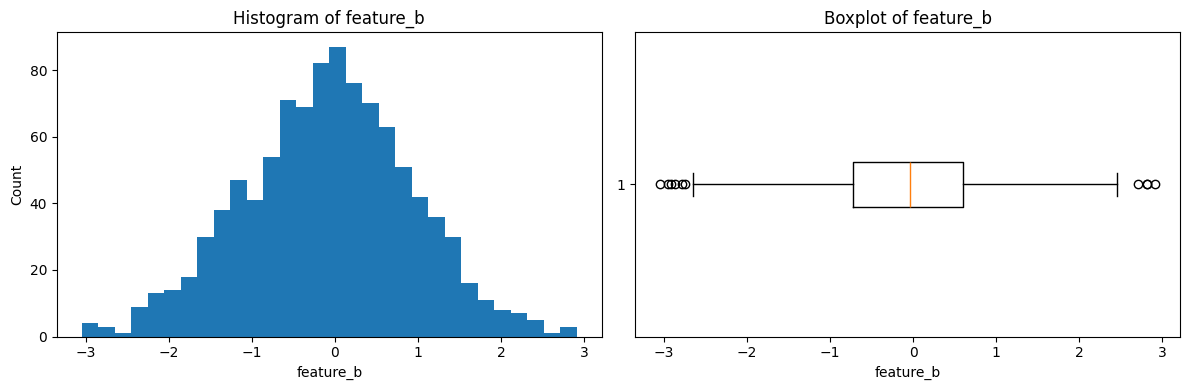

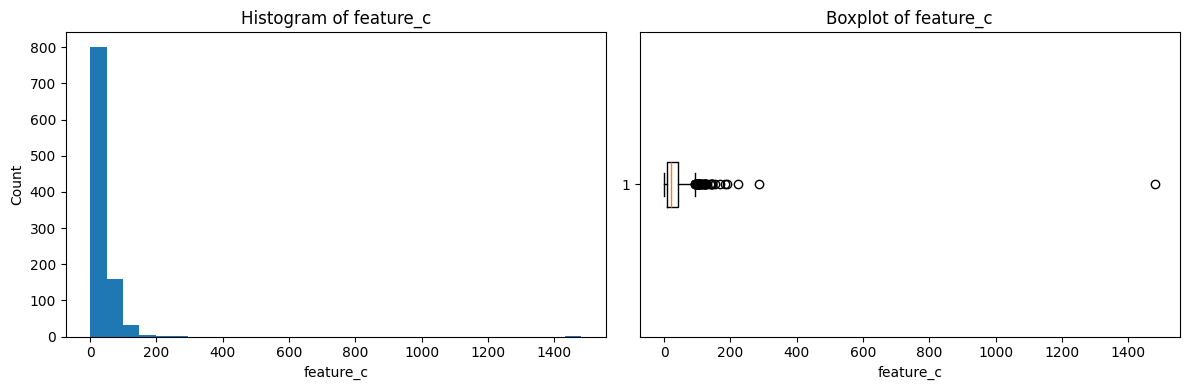

In [43]:
#Sample code
cols_to_plot = numeric_cols[:3] if len(numeric_cols) >= 3 else numeric_cols
for col in cols_to_plot:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    axes[0].hist(df[col].dropna(), bins=30)
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')
    
    axes[1].boxplot(df[col].dropna(), vert=False)
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].set_xlabel(col)
    
    plt.tight_layout()
    plt.show()


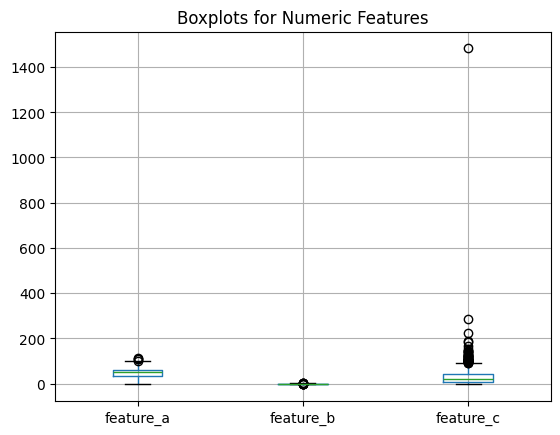

In [44]:
# Simple boxplot for all numeric columns
df.boxplot(column=["feature_a","feature_b","feature_c"])
plt.title("Boxplots for Numeric Features")
plt.show()

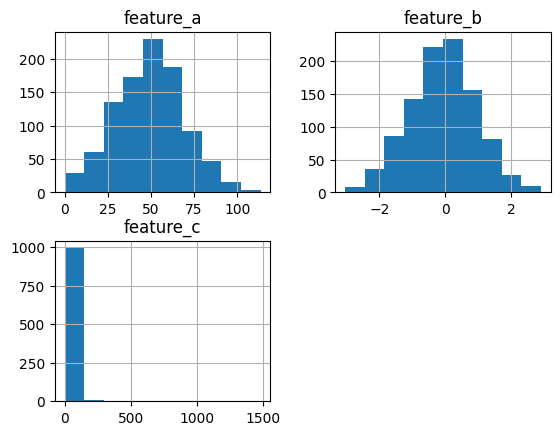

In [45]:
df.hist(column=["feature_a","feature_b","feature_c"])
plt.title("Histogram for Numeric Features")
plt.show()

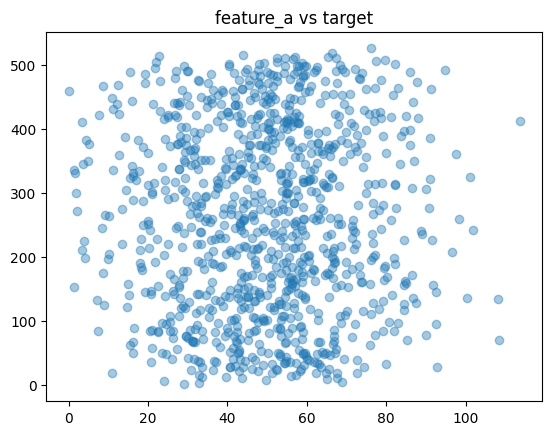

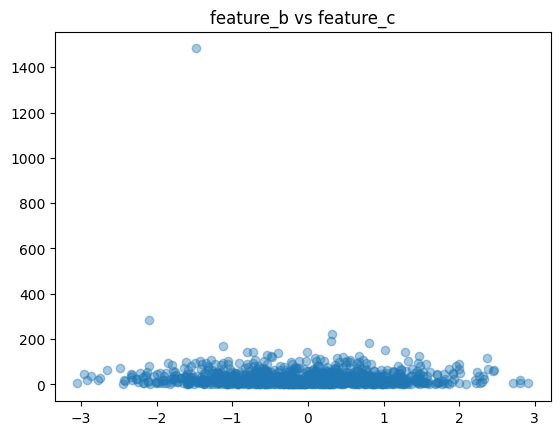

In [49]:
plt.scatter(df['feature_a'], df['target'],alpha = 0.4)

plt.title('feature_a vs target')
plt.show()

plt.scatter(df['feature_b'], df['feature_c'],alpha = 0.4)
plt.title('feature_b vs feature_c')
plt.show()

In [ ]:
#Correlations